## Basic analysis of the extracted data for each parcel (plot) of the rice data (observed in field data vs observed satellite data)

Consideraciones:

1. NO debo olvidar que esto se basa en el valor promedio de los pixeles de las parcelas para cada escena, tanto de PlanetScope como de Sentinel-1


### Ver el comportamiento del crecimiento en todas las parcelas

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

crop_data = pd.read_csv('../DataIn/Analisis_basico_crecimiento/crop_register.csv')

In [104]:
crop_data

,crop_register_id,location_id,site_id,farmer_id,type_variety_id,variety_id,estado_fenologico,fecha_siembra,fecha_trasplante,fecha_cosecha,fecha_medicion,dias_despues_siembra,n_plantas,peso_fresco,peso_fresco_planta,peso_seco,peso_seco_planta,long_raiz,altura_planta,leaf_area_index
0,1,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-08-10,1,1.0,0.10,0.100000,0.10,0.100000,1.0,1.0,0.00
1,2,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-09-28,48,5.0,9.36,1.872000,1.65,0.330000,17.0,49.0,0.14
2,3,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-10-10,60,5.0,32.10,6.420000,3.97,0.794000,19.0,53.0,0.35
3,4,1,1,1,1,1,Prenha,2022-08-10,2022-09-27,2022-11-30,2022-10-19,69,5.0,70.19,14.038000,8.46,1.692000,30.0,66.0,0.71
4,5,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-11-19,99,9.0,155.82,17.313333,37.18,4.131111,27.0,84.0,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,5,1,3,2,2,NaN,2023-07-17,2023-09-15,2023-12-12,2023-09-29,73,7.0,22.94,3.277143,2.93,0.418571,17.0,55.0,0.83
65,66,5,1,3,2,2,NaN,2023-07-17,2023-09-15,2023-12-12,2023-10-14,88,5.0,52.10,10.420000,7.41,1.482000,29.0,70.0,1.26
66,67,5,1,3,2,2,NaN,2023-07-17,2023-09-15,2023-12-12,2023-10-29,103,17.0,170.47,10.027647,33.85,1.991176,28.0,101.0,2.09
67,68,5,1,3,2,2,NaN,2023-07-17,2023-09-15,2023-12-12,2023-11-16,120,6.0,144.00,24.000000,26.06,4.343333,30.0,144.0,2.16


<Figure size 1200x600 with 0 Axes>

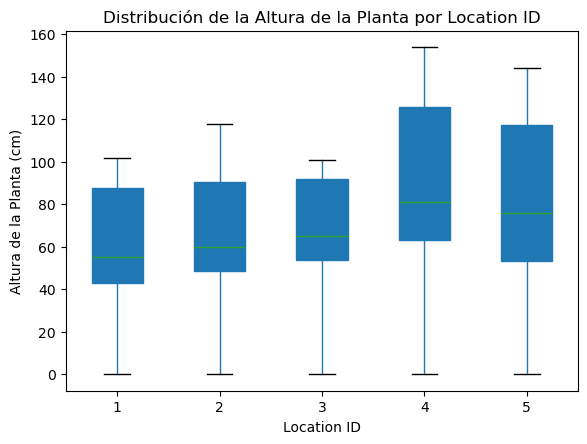

<Figure size 1200x600 with 0 Axes>

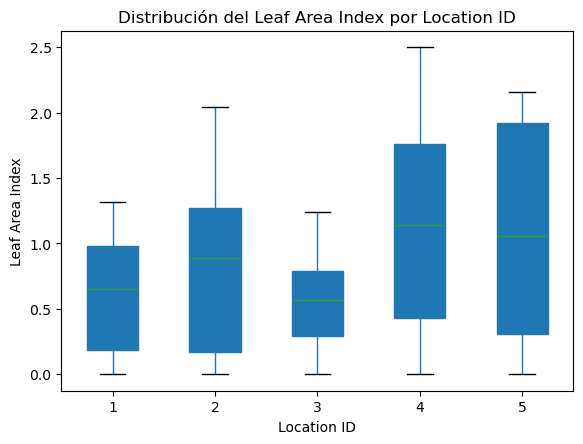

In [105]:


# Convertir la fecha de medición al formato de fecha
crop_data['fecha_medicion'] = pd.to_datetime(crop_data['fecha_medicion'])

# Filtrar las columnas relevantes
boxplot_data = crop_data[['location_id', 'altura_planta', 'leaf_area_index']]

# Crear boxplot para Altura de Planta
plt.figure(figsize=(12, 6))
boxplot_data.boxplot(column='altura_planta', by='location_id', grid=False, patch_artist=True)
plt.title('Distribución de la Altura de la Planta por Location ID')
plt.suptitle('')
plt.xlabel('Location ID')
plt.ylabel('Altura de la Planta (cm)')
plt.show()

# Crear boxplot para Leaf Area Index
plt.figure(figsize=(12, 6))
boxplot_data.boxplot(column='leaf_area_index', by='location_id', grid=False, patch_artist=True)
plt.title('Distribución del Leaf Area Index por Location ID')
plt.suptitle('')
plt.xlabel('Location ID')
plt.ylabel('Leaf Area Index')
plt.show()

### Crecimiento vs indices planet

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')
crop_data = pd.read_csv('../DataIn/Analisis_basico_crecimiento/crop_register.csv')


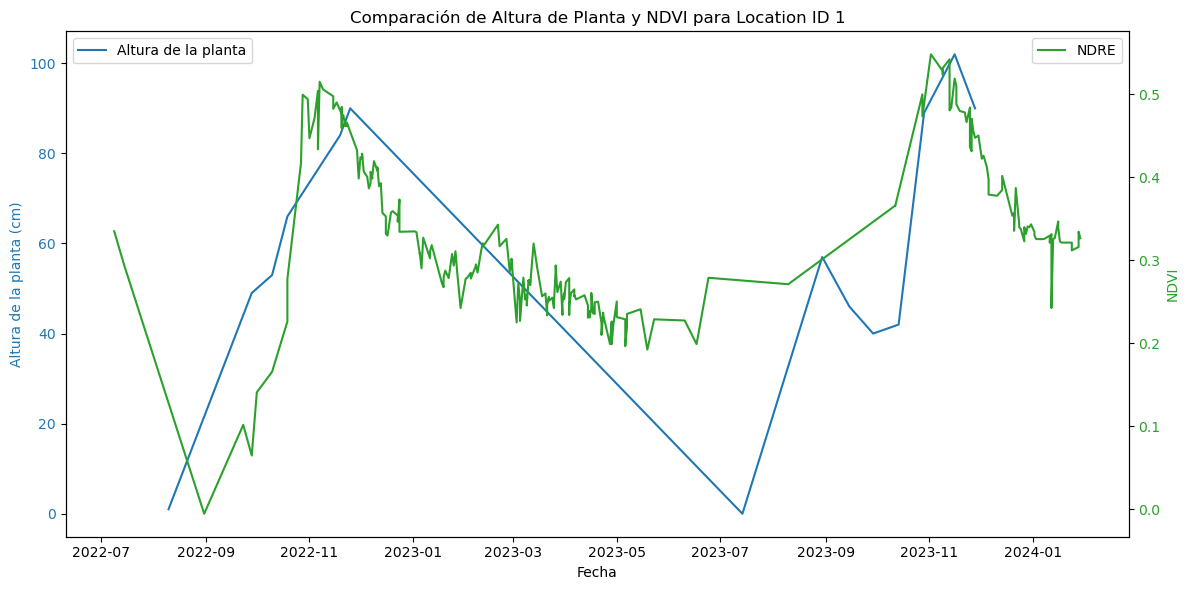

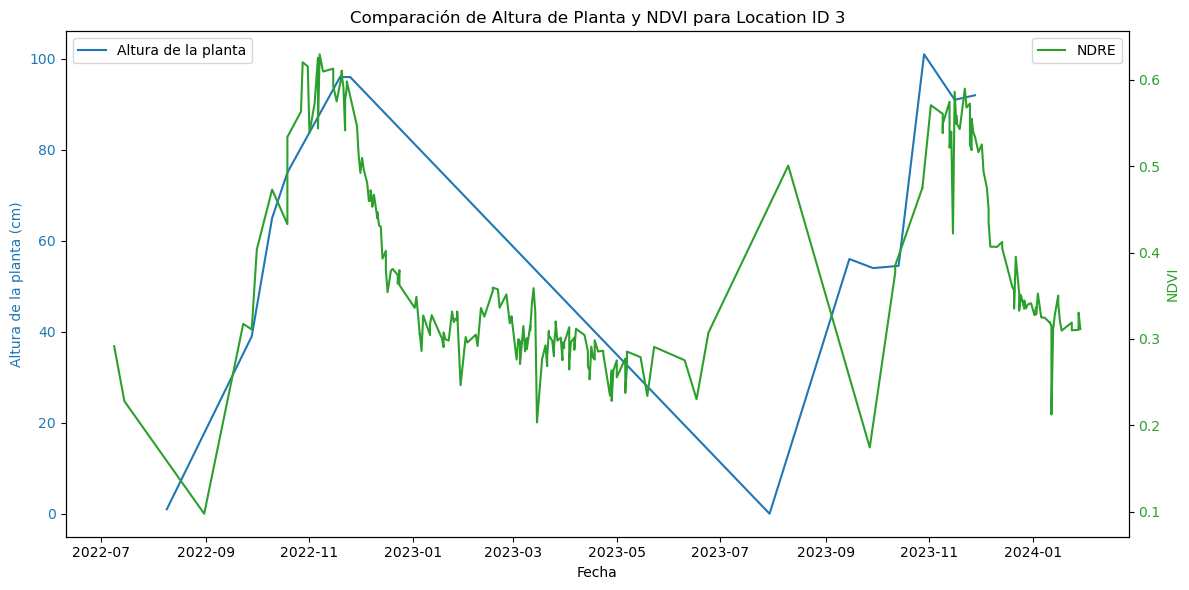

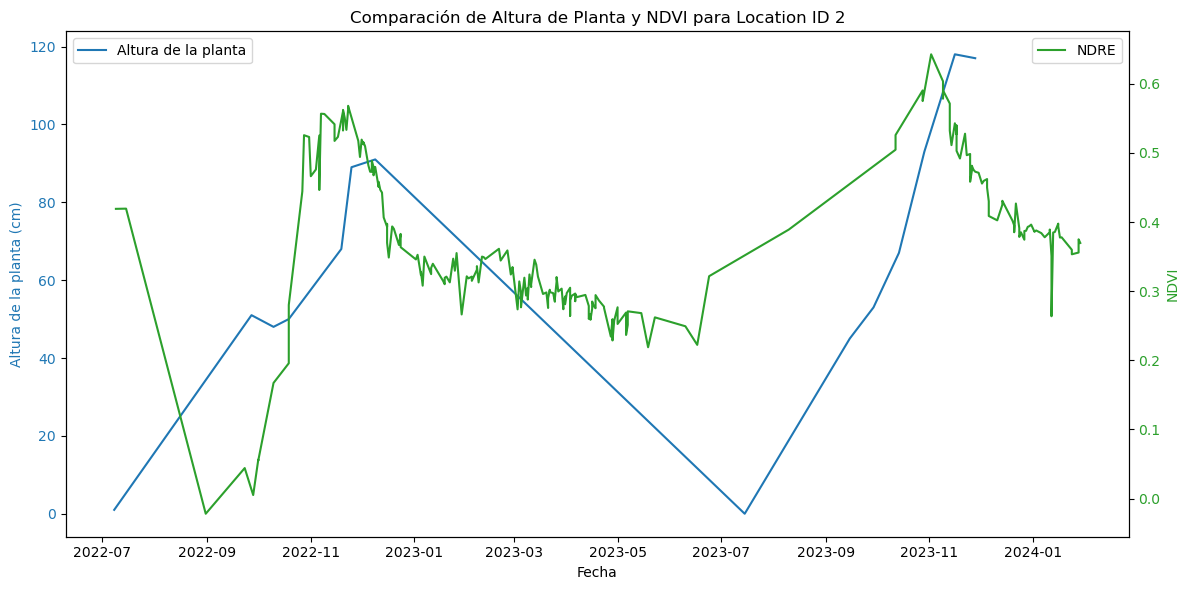

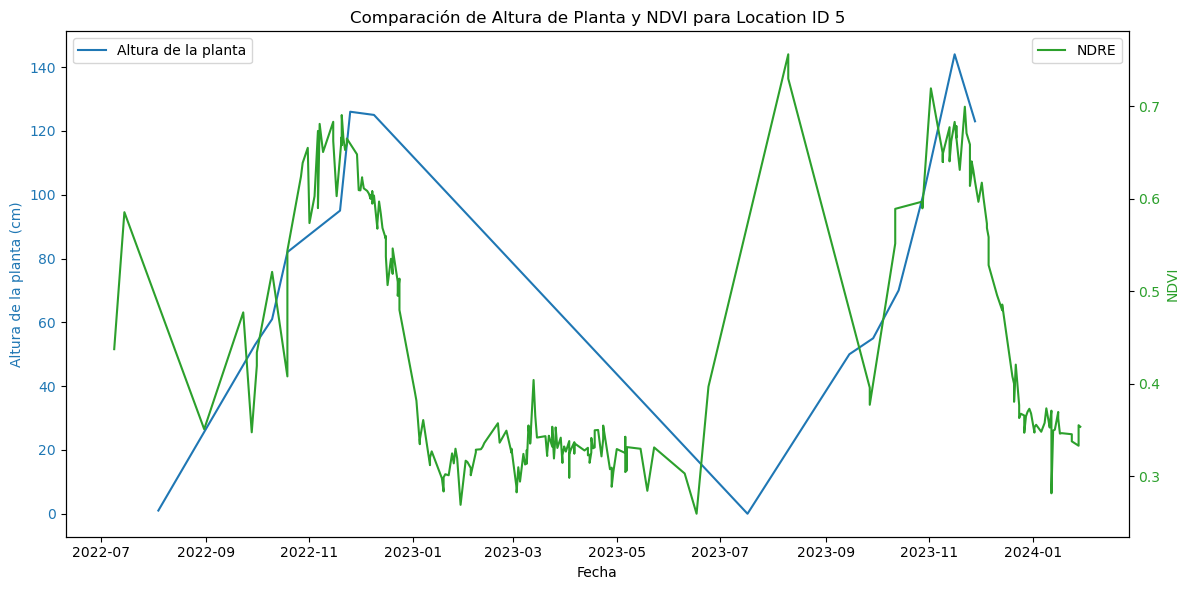

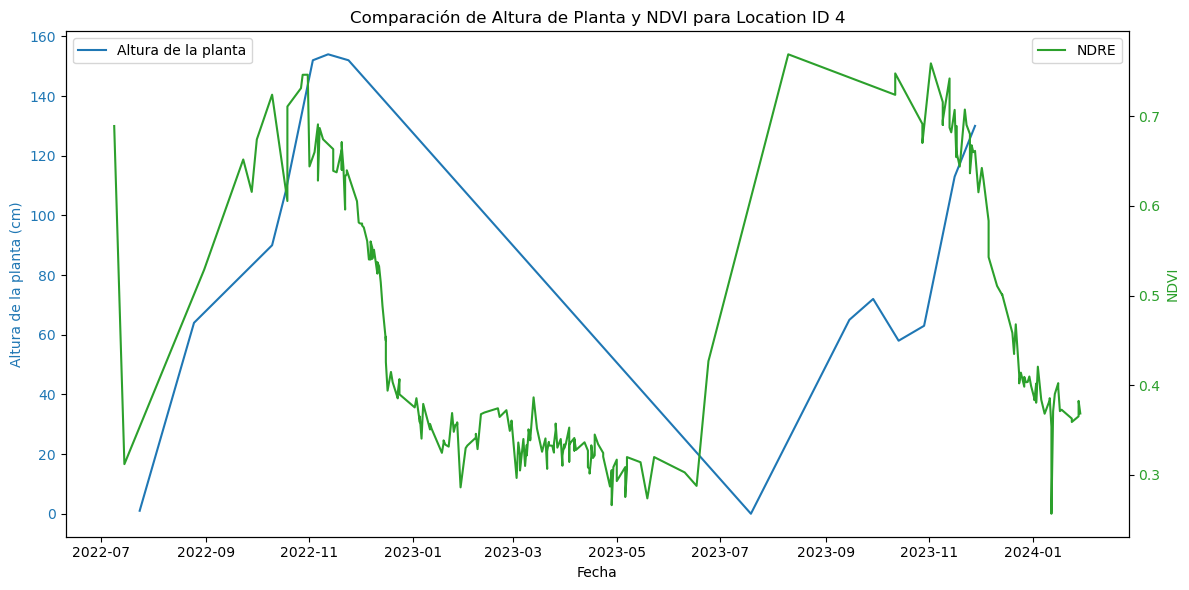

In [107]:

# Convertir las fechas en ambos datasets al formato de fecha
planet_data['image_date'] = pd.to_datetime(planet_data['image_date'])
crop_data['fecha_medicion'] = pd.to_datetime(crop_data['fecha_medicion'])

# Obtener la lista de location_id únicos
location_ids = crop_data['location_id'].unique()

# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    planet_data_loc = planet_data.copy()
    planet_data_loc = planet_data_loc[planet_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Altura de la planta (cm)', color='tab:blue')
    ax1.plot(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Altura de la planta')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='tab:green')
    ax2.plot(planet_data_loc['image_date'], planet_data_loc['NDVI'], color='tab:green', label='NDRE')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Comparación de Altura de Planta y NDVI para Location ID {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()


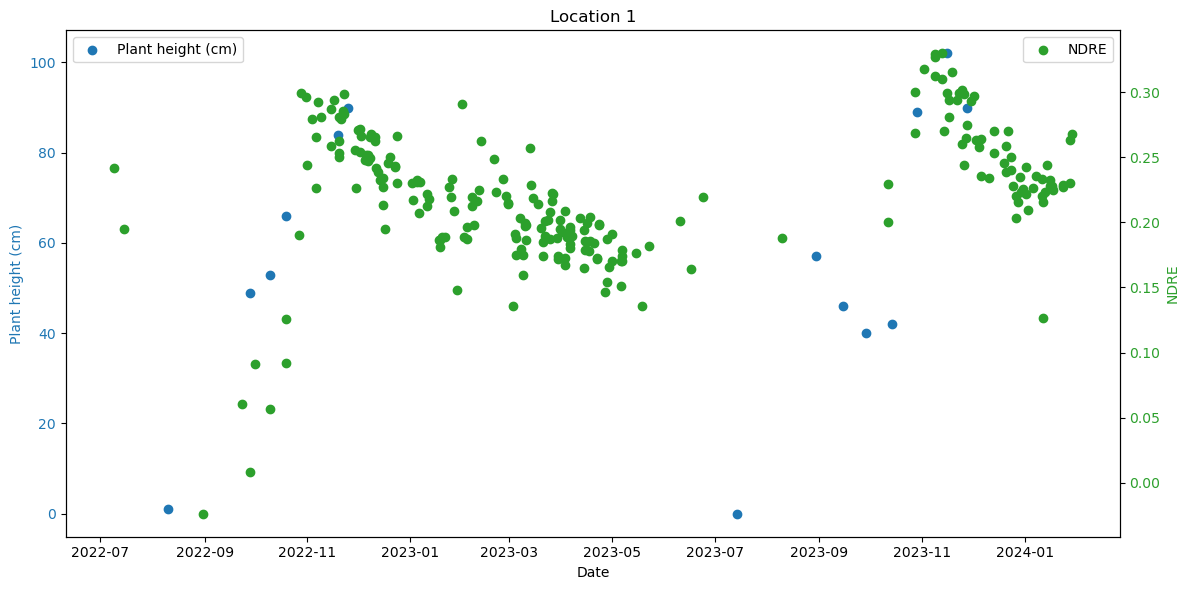

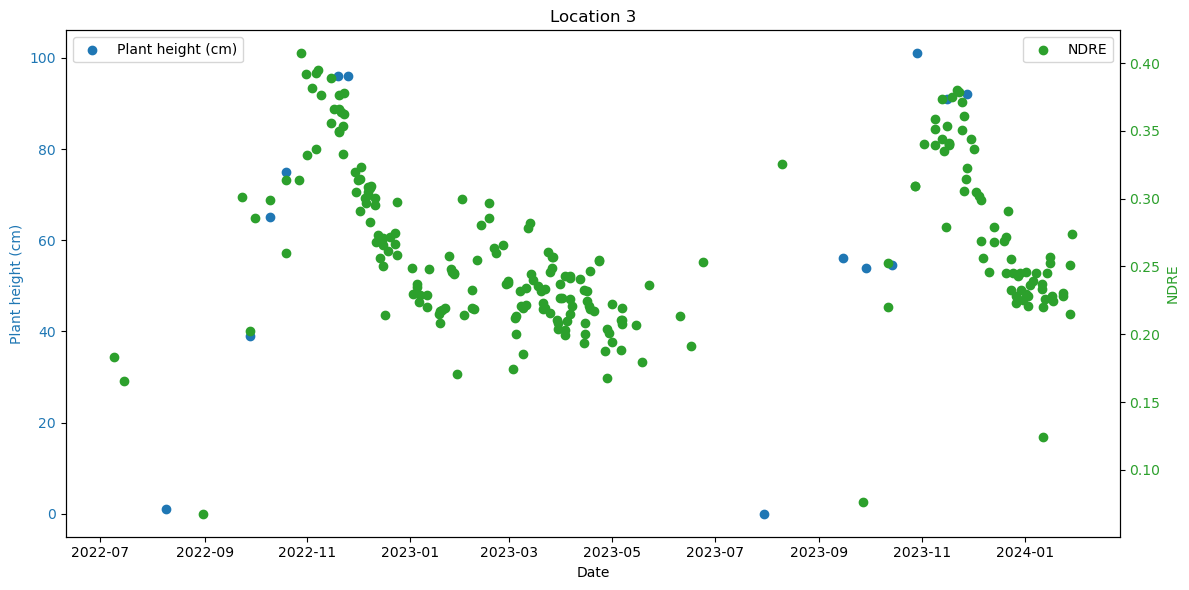

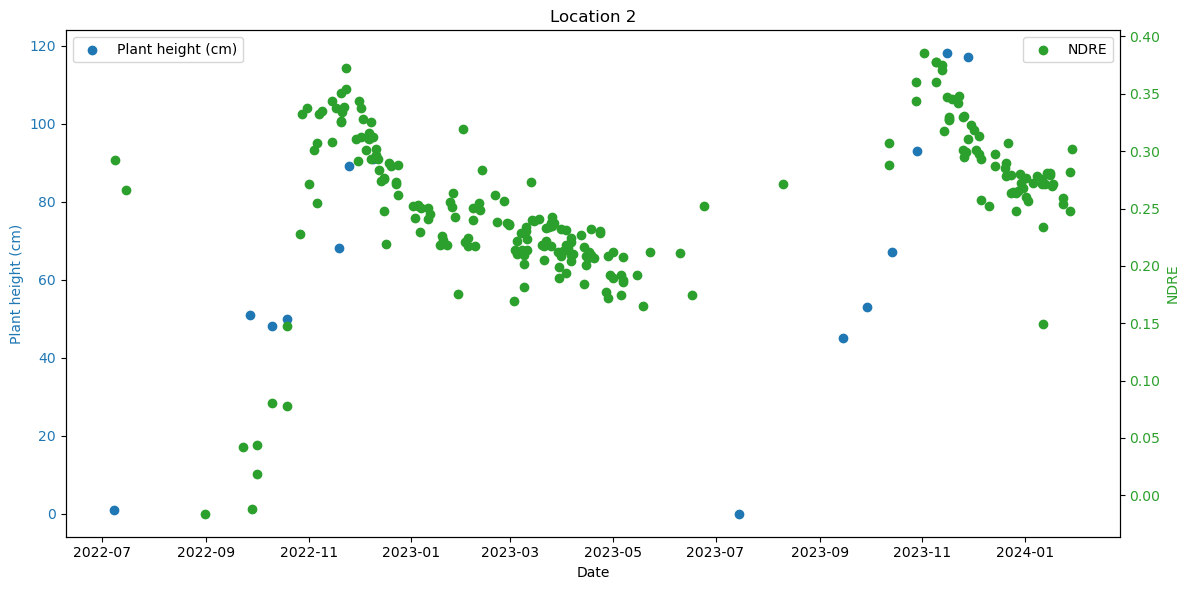

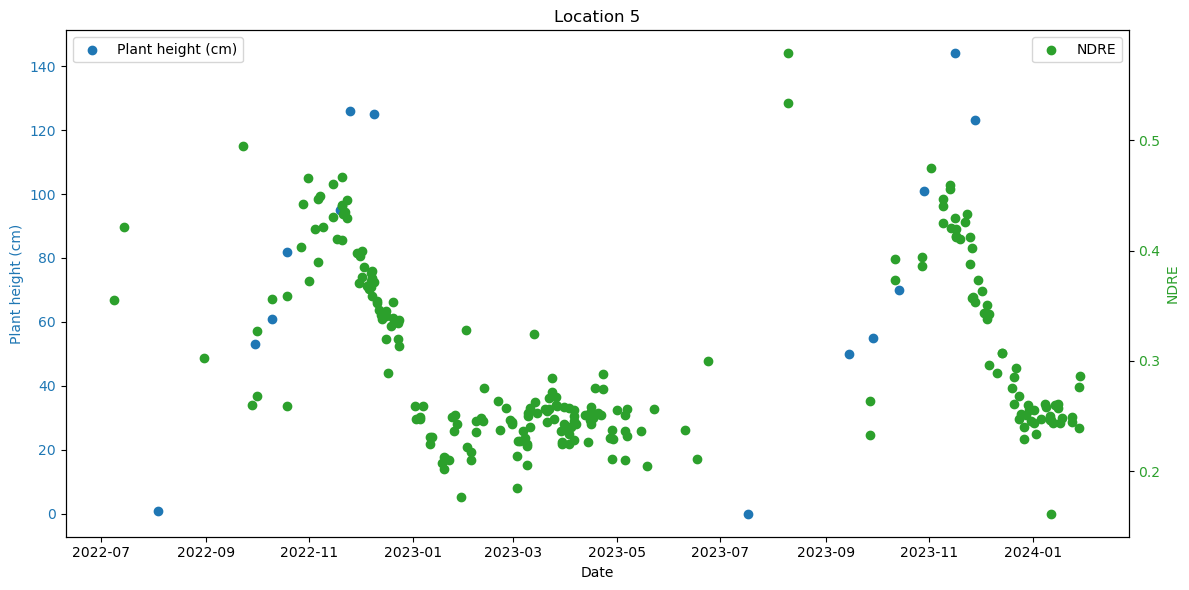

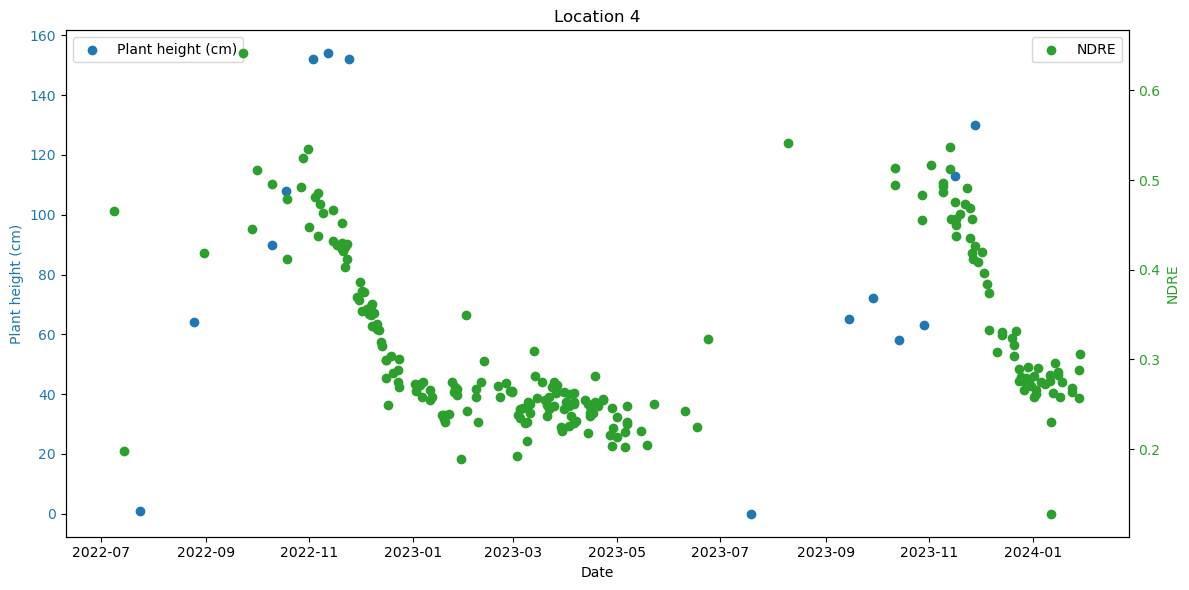

In [108]:
# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    planet_data_loc = planet_data.copy()
    planet_data_loc = planet_data_loc[planet_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Plant height (cm)', color='tab:blue')
    ax1.scatter(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Plant height (cm)')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDRE', color='tab:green')
    ax2.scatter(planet_data_loc['image_date'], planet_data_loc['NDRE'], color='tab:green', label='NDRE')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Location {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()

### Crecimiento vs indices SAR

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
SAR_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Sentinel_1_data.xlsx', sheet_name = 'Sheet2')

In [110]:
SAR_data.head()

,location_id,polygon_id,Stokes2_DoLP,Stokes2_LPR,Stokes2_Phi,Stokes2_Tau,Stokes2_g0,Stokes2_g1,Stokes2_g2,Stokes2_g3,...,Stokes2_l2,alpha,area_ha,area_m2,entropy,entropy_shannon,entropy_shannon_norm,image_date,span,geometry
0,1,3,0.571070,0.278899,-2.987174,2.377644,0.087572,0.049622,-0.005814,0.003623,...,0.018504,22.286879,0.0417,417.453,0.745245,-2.379428,0.574763,2022-07-04,0.075529,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
1,1,3,0.695337,0.181027,-2.029710,-2.246712,0.143738,0.099701,-0.007047,-0.007791,...,0.021726,15.717934,0.0417,417.453,0.612639,-1.646521,0.677675,2022-07-16,0.153608,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
2,1,3,0.755319,0.143670,-3.612245,0.086670,0.122078,0.091424,-0.011658,0.000278,...,0.014922,13.770551,0.0417,417.453,0.535649,-2.149926,0.571785,2022-07-28,0.126392,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
3,1,3,0.684568,0.188089,0.837804,-2.817688,0.156095,0.107194,0.002817,-0.010857,...,0.024120,16.142057,0.0417,417.453,0.622882,-1.467737,0.719372,2022-08-09,0.206184,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
4,1,3,0.657874,0.207113,-0.408160,-4.948636,0.107767,0.070913,-0.001161,-0.012370,...,0.017844,18.389165,0.0417,417.453,0.648314,-2.148673,0.621456,2022-08-21,0.095385,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."


In [111]:
crop_data.head()

,crop_register_id,location_id,site_id,farmer_id,type_variety_id,variety_id,estado_fenologico,fecha_siembra,fecha_trasplante,fecha_cosecha,fecha_medicion,dias_despues_siembra,n_plantas,peso_fresco,peso_fresco_planta,peso_seco,peso_seco_planta,long_raiz,altura_planta,leaf_area_index
0,1,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-08-10,1,1.0,0.10,0.100000,0.10,0.100000,1.0,1.0,0.00
1,2,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-09-28,48,5.0,9.36,1.872000,1.65,0.330000,17.0,49.0,0.14
2,3,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-10-10,60,5.0,32.10,6.420000,3.97,0.794000,19.0,53.0,0.35
3,4,1,1,1,1,1,Prenha,2022-08-10,2022-09-27,2022-11-30,2022-10-19,69,5.0,70.19,14.038000,8.46,1.692000,30.0,66.0,0.71
4,5,1,1,1,1,1,NaN,2022-08-10,2022-09-27,2022-11-30,2022-11-19,99,9.0,155.82,17.313333,37.18,4.131111,27.0,84.0,0.60


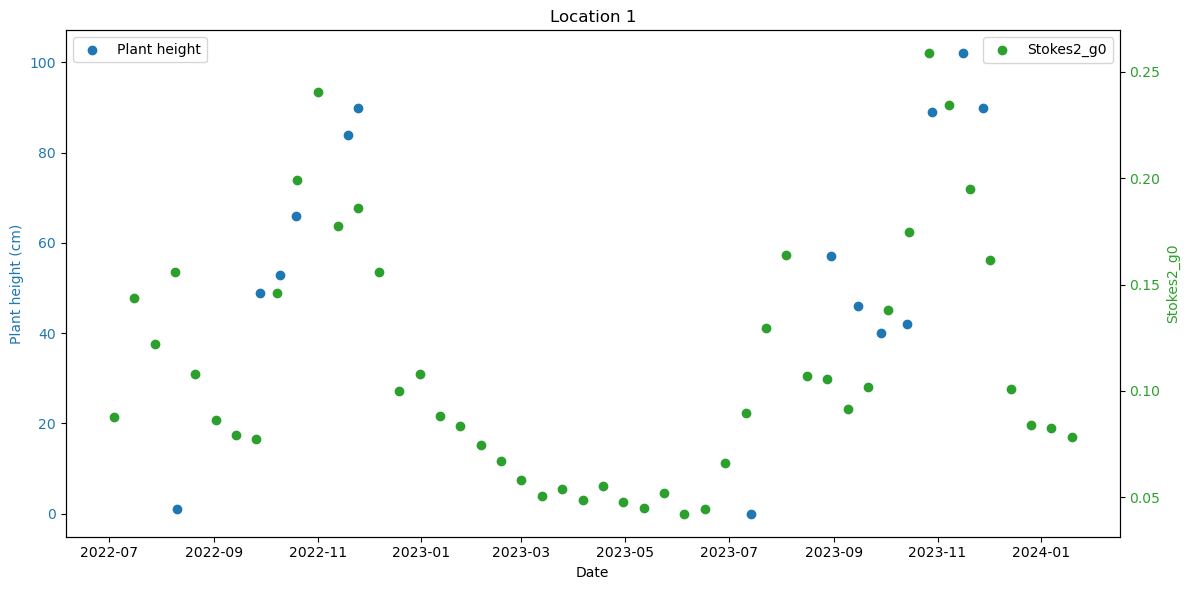

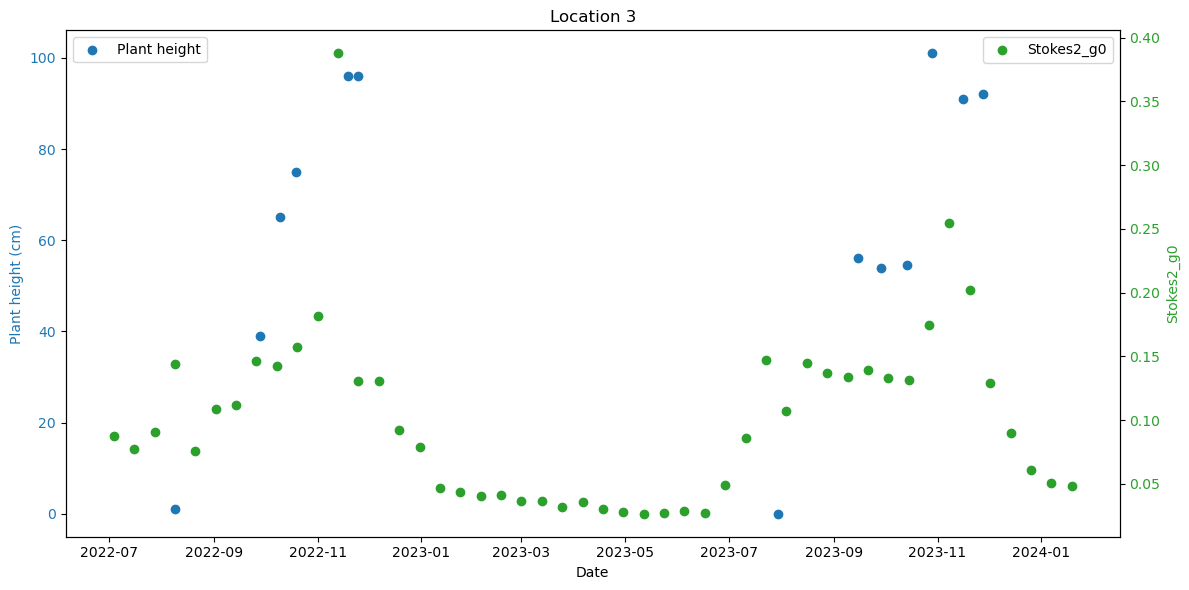

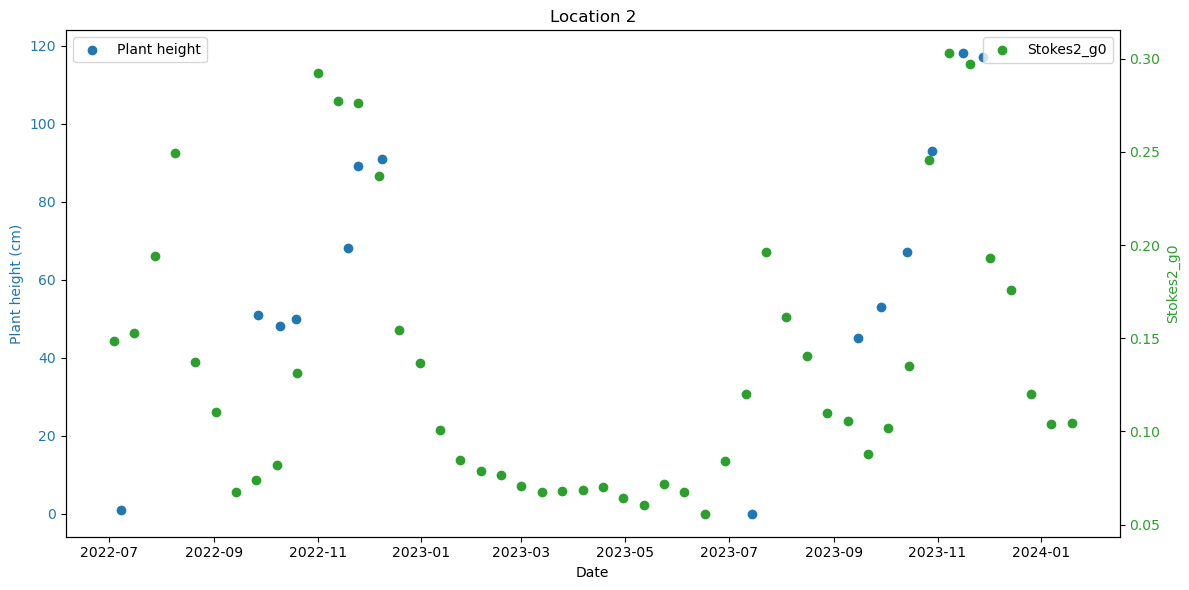

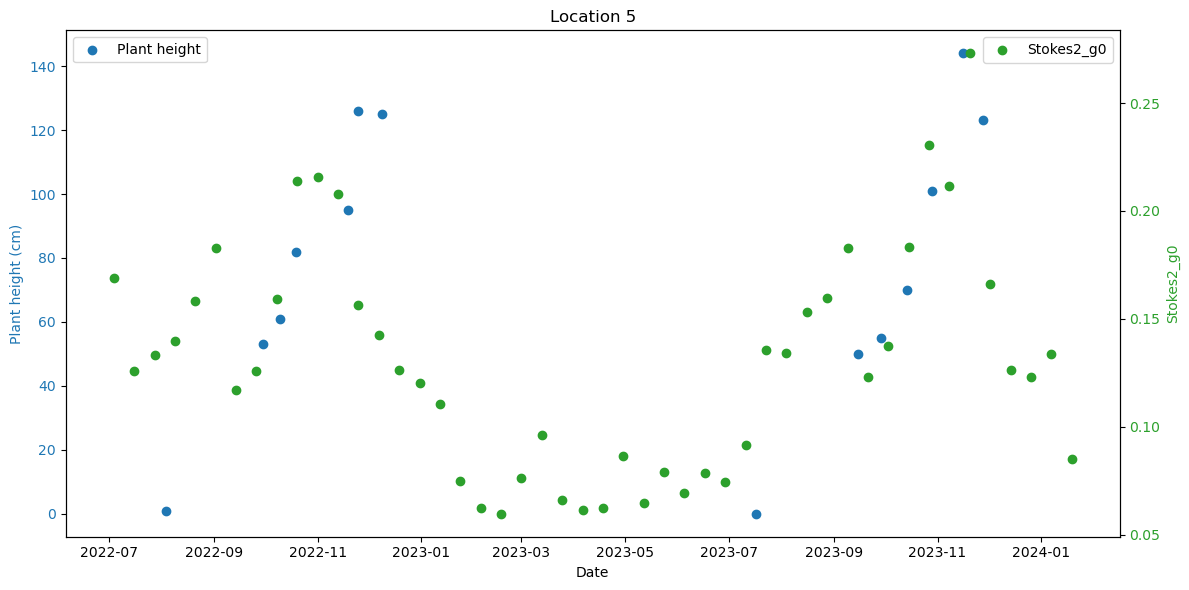

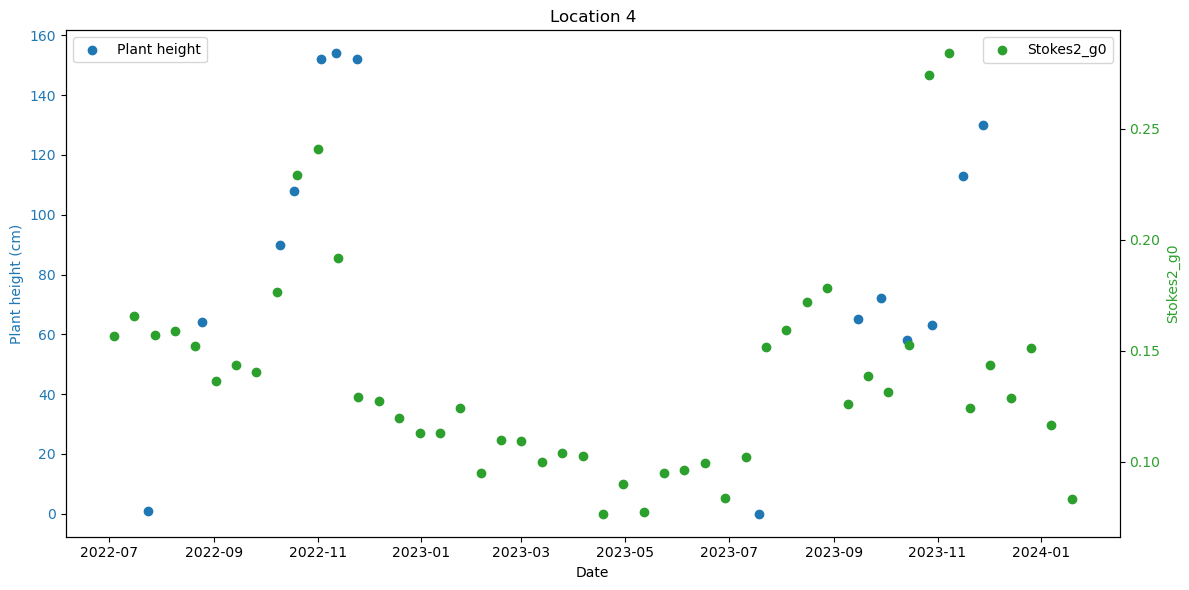

In [112]:
# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    SAR_data_loc = SAR_data.copy()
    SAR_data_loc = SAR_data_loc[SAR_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Plant height (cm)', color='tab:blue')
    ax1.scatter(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Plant height')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: 
    ax2 = ax1.twinx()
    ax2.set_ylabel('Stokes2_g0', color='tab:green')
    ax2.scatter(SAR_data_loc['image_date'], SAR_data_loc['Stokes2_g0'], color='tab:green', label='Stokes2_g0')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Location {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()

## Ver los plots temporales con señalización de la fecha de siembra y en relación con el calendario 

### Caso de PlanetScope

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')

*Localización del lote 1*

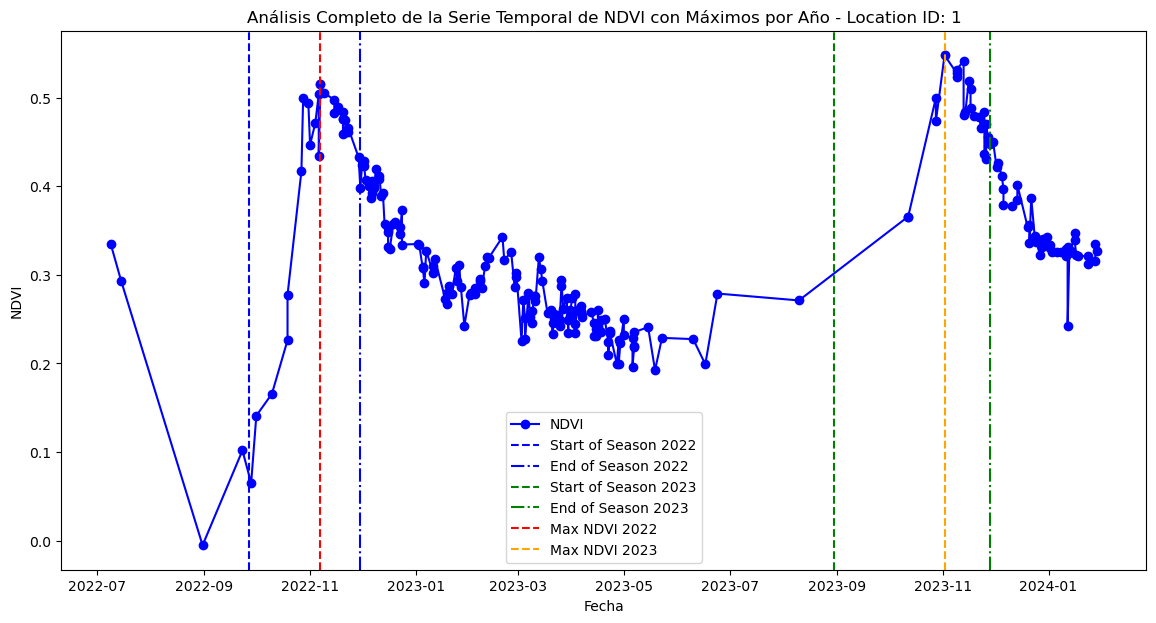

In [116]:

# Filtrar los datos por 'location_id'
location_id = 1
import pandas as pd
import matplotlib.pyplot as plt

# Convertir columnas de fechas a datetime si aún no lo están
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023 basadas en 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filtrar los datos para cada año
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identificar la fecha con el máximo valor de NDVI para cada año
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red')

# Señalar el máximo de NDVI en 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'Análisis Completo de la Serie Temporal de NDVI con Máximos por Año - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.grid(False)
plt.show()




*Localización del lote 2*

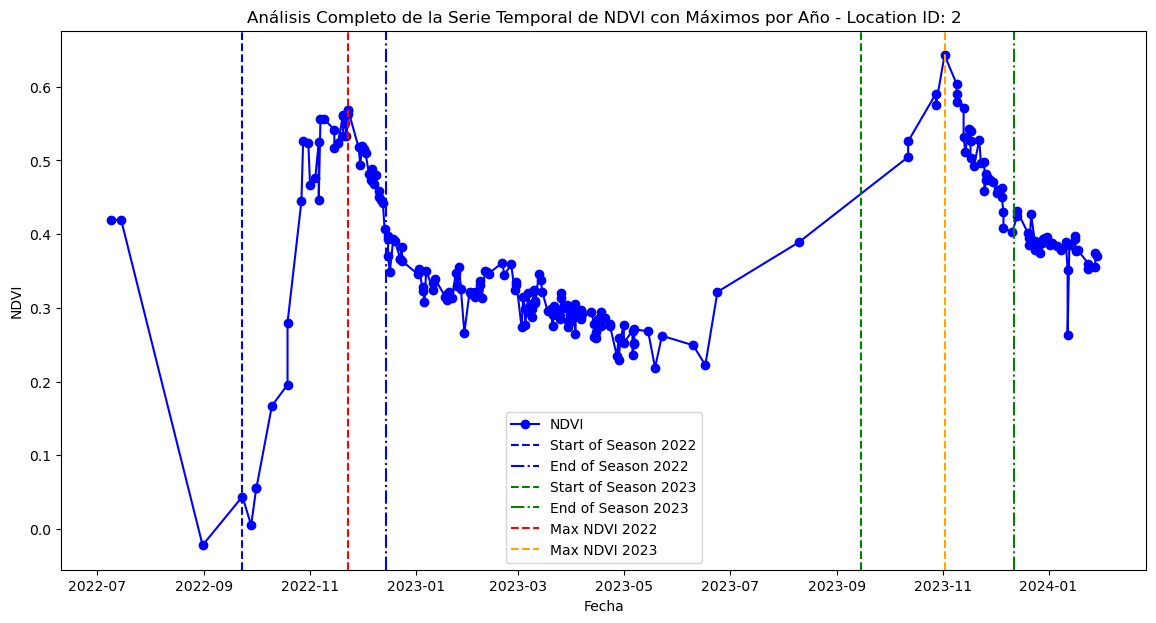

In [119]:
# Definir las fechas de inicio y fin de temporada para 2022 y 2023


planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')

import pandas as pd
import matplotlib.pyplot as plt

# Convertir columnas de fechas a datetime si aún no lo están
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 2
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023 basadas en 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filtrar los datos para cada año
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identificar la fecha con el máximo valor de NDVI para cada año
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red')

# Señalar el máximo de NDVI en 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'Análisis Completo de la Serie Temporal de NDVI con Máximos por Año - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.grid(False)
plt.show()

*Localización del lote 3*

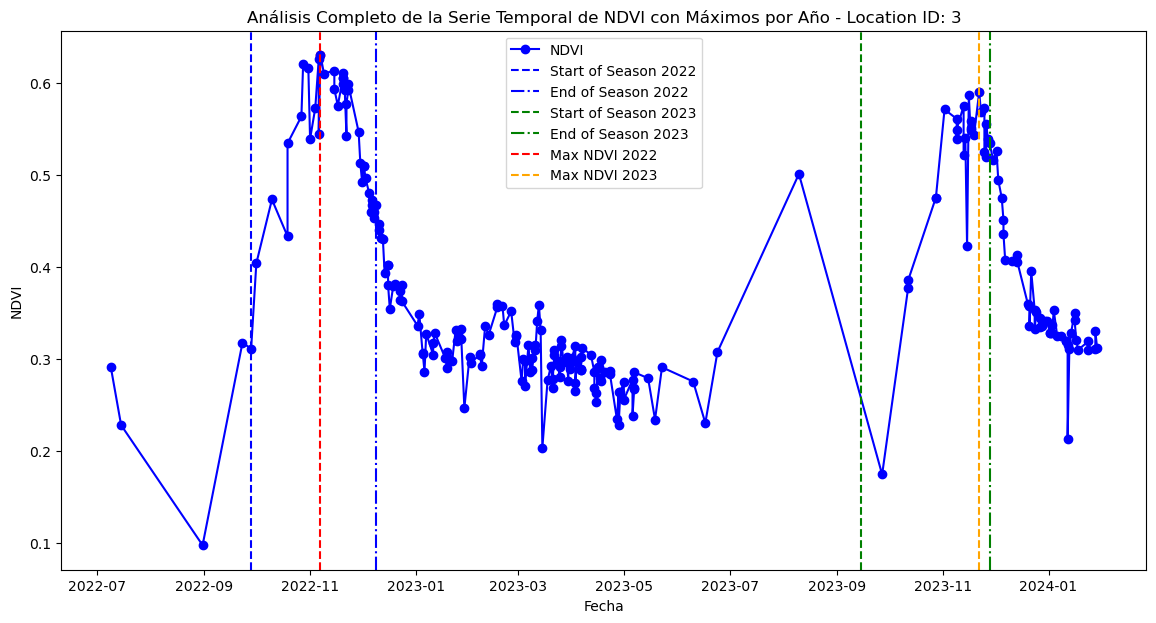

In [120]:
#Definir las fechas de inicio y fin de temporada para 2022 y 2023


planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')

import pandas as pd
import matplotlib.pyplot as plt

# Convertir columnas de fechas a datetime si aún no lo están
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 3
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023 basadas en 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filtrar los datos para cada año
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identificar la fecha con el máximo valor de NDVI para cada año
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red')

# Señalar el máximo de NDVI en 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'Análisis Completo de la Serie Temporal de NDVI con Máximos por Año - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.grid(False)
plt.show()

*Localización del lote 4*

In [ ]:
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')

import pandas as pd
import matplotlib.pyplot as plt

# Convertir columnas de fechas a datetime si aún no lo están
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 4
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023 basadas en 'crop_data'
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filtrar los datos para cada año
data_2022 = planet_data_location[planet_data_location['image_date'].dt.year == 2022]
data_2023 = planet_data_location[planet_data_location['image_date'].dt.year == 2023]

# Identificar la fecha con el máximo valor de NDVI para cada año
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', label='Max NDVI 2022')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red')

# Señalar el máximo de NDVI en 2023
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', label='Max NDVI 2023')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'Análisis Completo de la Serie Temporal de NDVI con Máximos por Año - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.grid(False)
plt.show()

*Localización del lote 5*

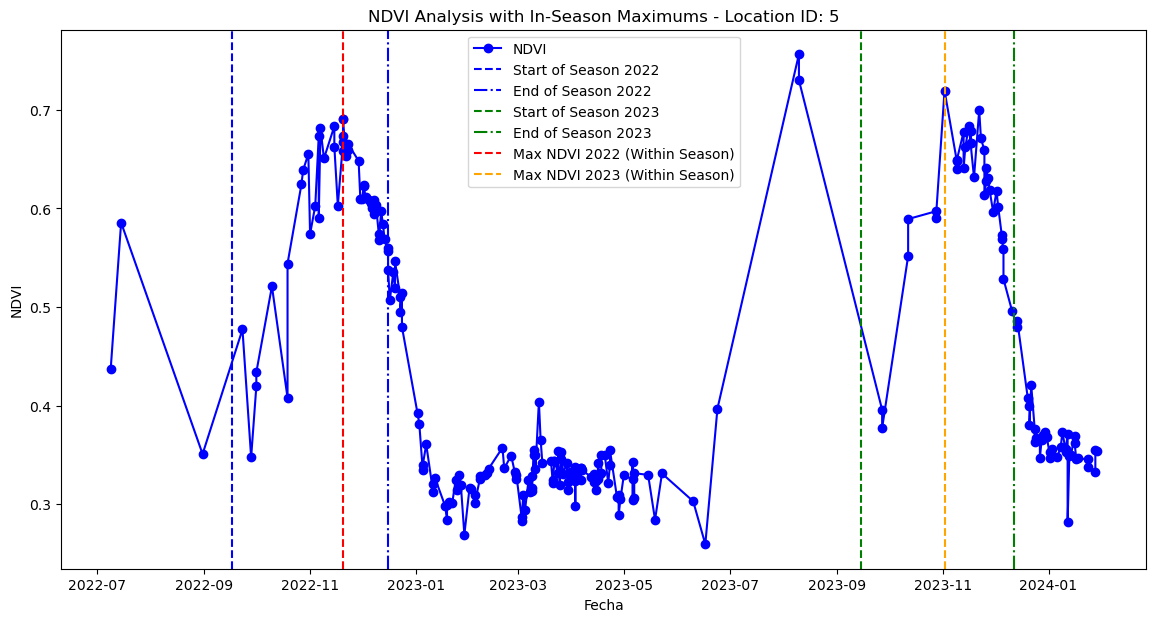

In [122]:
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')

# Asegurarse de que las columnas de fechas estén en formato datetime
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 5
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Filtrar los datos de NDVI solo entre trasplante y cosecha para 2022
data_2022 = planet_data_location[(planet_data_location['image_date'] >= start_date_2022) & 
                                 (planet_data_location['image_date'] <= end_date_2022)]

# Filtrar los datos de NDVI solo entre trasplante y cosecha para 2023
data_2023 = planet_data_location[(planet_data_location['image_date'] >= start_date_2023) & 
                                 (planet_data_location['image_date'] <= end_date_2023)]

# Identificar la fecha con el máximo valor de NDVI para cada año dentro del período de crecimiento
max_ndvi_date_2022 = data_2022.loc[data_2022['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2022 = data_2022['NDVI'].max()

max_ndvi_date_2023 = data_2023.loc[data_2023['NDVI'].idxmax(), 'image_date']
max_ndvi_value_2023 = data_2023['NDVI'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(planet_data_location['image_date'], planet_data_location['NDVI'], label='NDVI', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022 dentro del período de crecimiento
plt.axvline(x=max_ndvi_date_2022, color='red', linestyle='--', label='Max NDVI 2022 (Within Season)')
plt.scatter(max_ndvi_date_2022, max_ndvi_value_2022, color='red')

# Señalar el máximo de NDVI en 2023 dentro del período de crecimiento
plt.axvline(x=max_ndvi_date_2023, color='orange', linestyle='--', label='Max NDVI 2023 (Within Season)')
plt.scatter(max_ndvi_date_2023, max_ndvi_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'NDVI Analysis with In-Season Maximums - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.grid(False)
plt.show()

### Caso de Sentinel-1

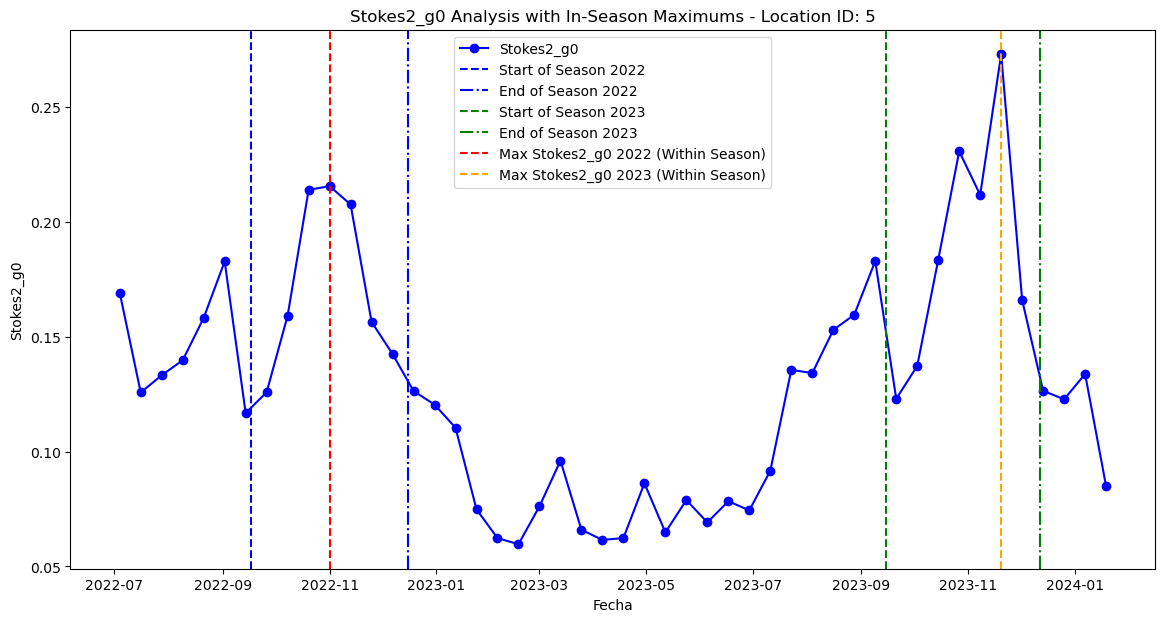

In [126]:
SAR_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Sentinel_1_data.xlsx', sheet_name = 'Sheet2')

# Asegurarse de que las columnas de fechas estén en formato datetime
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

# Filtrar los datos de NDVI solo entre trasplante y cosecha para 2022
data_2022 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2022) & 
                                 (SAR_data_location['image_date'] <= end_date_2022)]

# Filtrar los datos de NDVI solo entre trasplante y cosecha para 2023
data_2023 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2023) & 
                                 (SAR_data_location['image_date'] <= end_date_2023)]

# Identificar la fecha con el máximo valor de NDVI para cada año dentro del período de crecimiento
max_Stokes2_g0_date_2022 = data_2022.loc[data_2022['Stokes2_g0'].idxmax(), 'image_date']
max_Stokes2_g0_value_2022 = data_2022['Stokes2_g0'].max()

max_Stokes2_g0_date_2023 = data_2023.loc[data_2023['Stokes2_g0'].idxmax(), 'image_date']
max_Stokes2_g0_value_2023 = data_2023['Stokes2_g0'].max()

# Graficar los resultados
plt.figure(figsize=(14, 7))

# NDVI Serie Completa
plt.plot(SAR_data_location['image_date'], SAR_data_location['Stokes2_g0'], label='Stokes2_g0', color='blue', marker='o')

# Señalar las fechas de inicio y fin de temporada para 2022
plt.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
plt.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

# Señalar las fechas de inicio y fin de temporada para 2023
plt.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
plt.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

# Señalar el máximo de NDVI en 2022 dentro del período de crecimiento
plt.axvline(x=max_Stokes2_g0_date_2022, color='red', linestyle='--', label='Max Stokes2_g0 2022 (Within Season)')
plt.scatter(max_Stokes2_g0_date_2022, max_Stokes2_g0_value_2022, color='red')

# Señalar el máximo de NDVI en 2023 dentro del período de crecimiento
plt.axvline(x=max_Stokes2_g0_date_2023, color='orange', linestyle='--', label='Max Stokes2_g0 2023 (Within Season)')
plt.scatter(max_Stokes2_g0_date_2023, max_Stokes2_g0_value_2023, color='orange')

# Etiquetas y leyenda
plt.title(f'Stokes2_g0 Analysis with In-Season Maximums - Location ID: {location_id}')
plt.xlabel('Fecha')
plt.ylabel('Stokes2_g0')
plt.legend()
plt.grid(False)
plt.show()

### Plots completos

##### Planet case

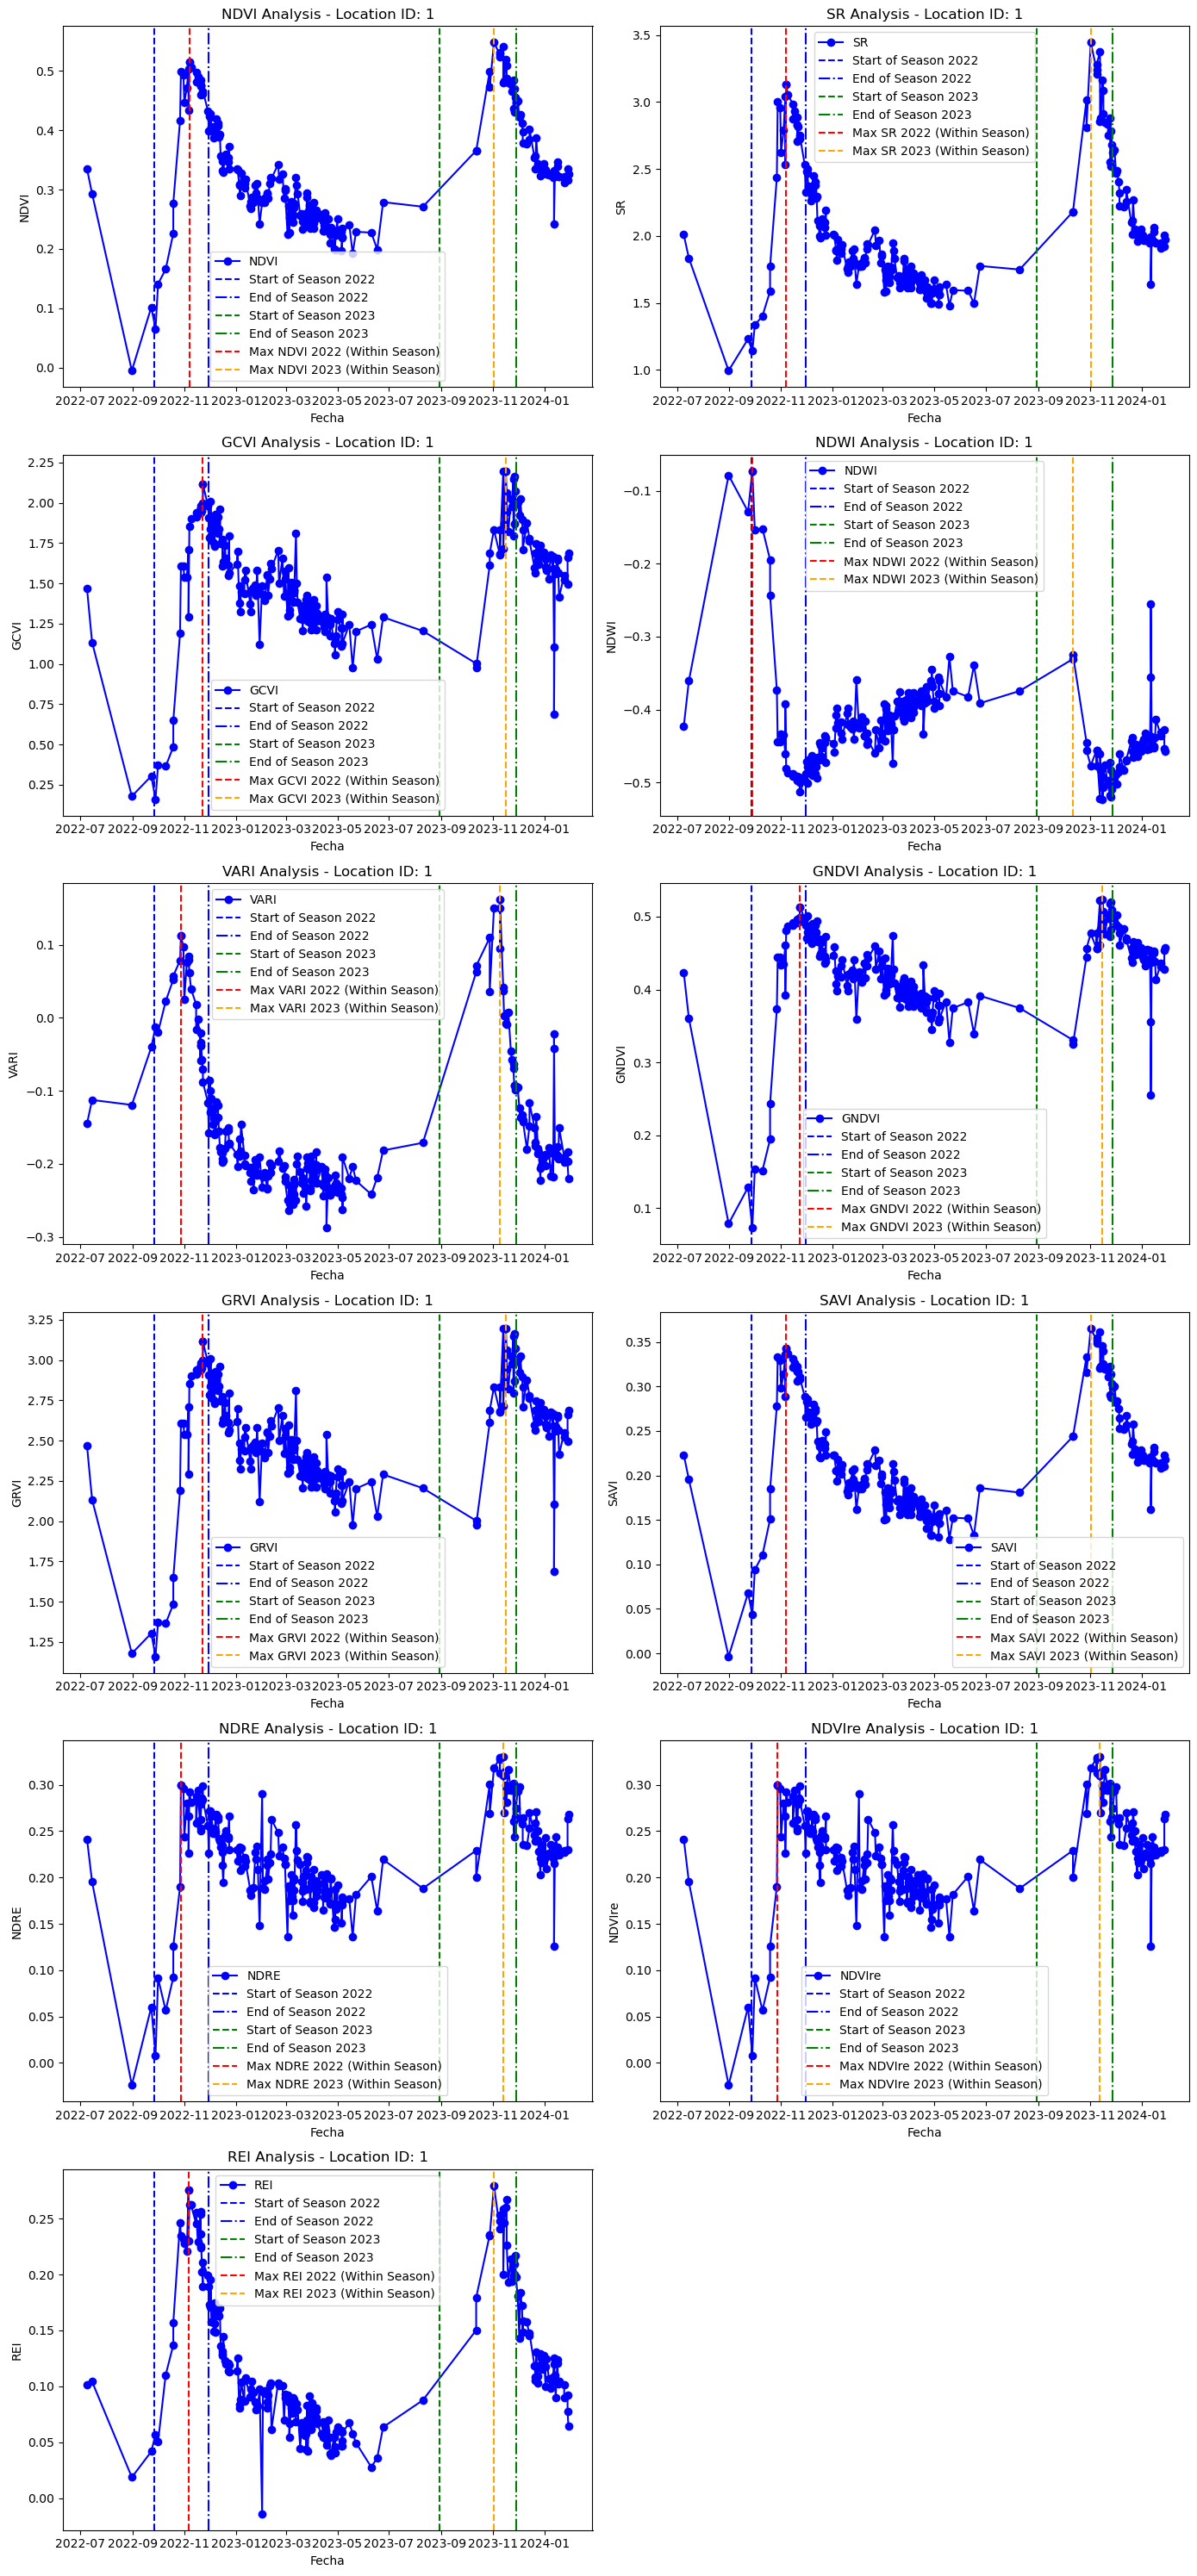

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que las columnas de fechas estén en formato datetime
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
planet_data_location = planet_data[planet_data['location_id'] == location_id]

# Lista de índices a graficar
indices = ['NDVI', 'SR', 'GCVI', 'NDWI', 'VARI', 'GNDVI', 'GRVI', 'SAVI', 'NDRE', 'NDVIre', 'REI']  # Añade aquí todos los índices que deseas plotear

# Configurar el número de gráficos por fila
plots_per_row = 2  # Cambia este número según la cantidad de plots por fila que desees

# Calcular el número de filas necesarias
num_rows = -(-len(indices) // plots_per_row)  # División entera redondeada hacia arriba

# Ajustar el tamaño de la figura dependiendo del número de filas y columnas
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 7, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes en un solo array

# Bucle para plotear cada índice
for i, index in enumerate(indices):
    # Filtrar los datos de NDVI solo entre trasplante y cosecha para 2022
    data_2022 = planet_data_location[(planet_data_location['image_date'] >= start_date_2022) & 
                                     (planet_data_location['image_date'] <= end_date_2022)]

    # Filtrar los datos de NDVI solo entre trasplante y cosecha para 2023
    data_2023 = planet_data_location[(planet_data_location['image_date'] >= start_date_2023) & 
                                     (planet_data_location['image_date'] <= end_date_2023)]

    # Identificar la fecha con el máximo valor de NDVI para cada año dentro del período de crecimiento
    max_value_date_2022 = data_2022.loc[data_2022[index].idxmax(), 'image_date']
    max_value_2022 = data_2022[index].max()

    max_value_date_2023 = data_2023.loc[data_2023[index].idxmax(), 'image_date']
    max_value_2023 = data_2023[index].max()

    # Graficar los resultados en el subplot correspondiente
    ax = axes[i]
    ax.plot(planet_data_location['image_date'], planet_data_location[index], label=index, color='blue', marker='o')

    # Señalar las fechas de inicio y fin de temporada para 2022
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

    # Señalar las fechas de inicio y fin de temporada para 2023
    ax.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

    # Señalar el máximo del índice en 2022 dentro del período de crecimiento
    ax.axvline(x=max_value_date_2022, color='red', linestyle='--', label=f'Max {index} 2022 (Within Season)')
    ax.scatter(max_value_date_2022, max_value_2022, color='red')

    # Señalar el máximo del índice en 2023 dentro del período de crecimiento
    ax.axvline(x=max_value_date_2023, color='orange', linestyle='--', label=f'Max {index} 2023 (Within Season)')
    ax.scatter(max_value_date_2023, max_value_2023, color='orange')

    # Etiquetas y leyenda
    ax.set_title(f'{index} Analysis - Location ID: {location_id}')
    ax.set_xlabel('Date')
    ax.set_ylabel(index)
    ax.legend()
    ax.grid(False)

# Si hay subplots vacíos, ocultarlos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### SAR Case

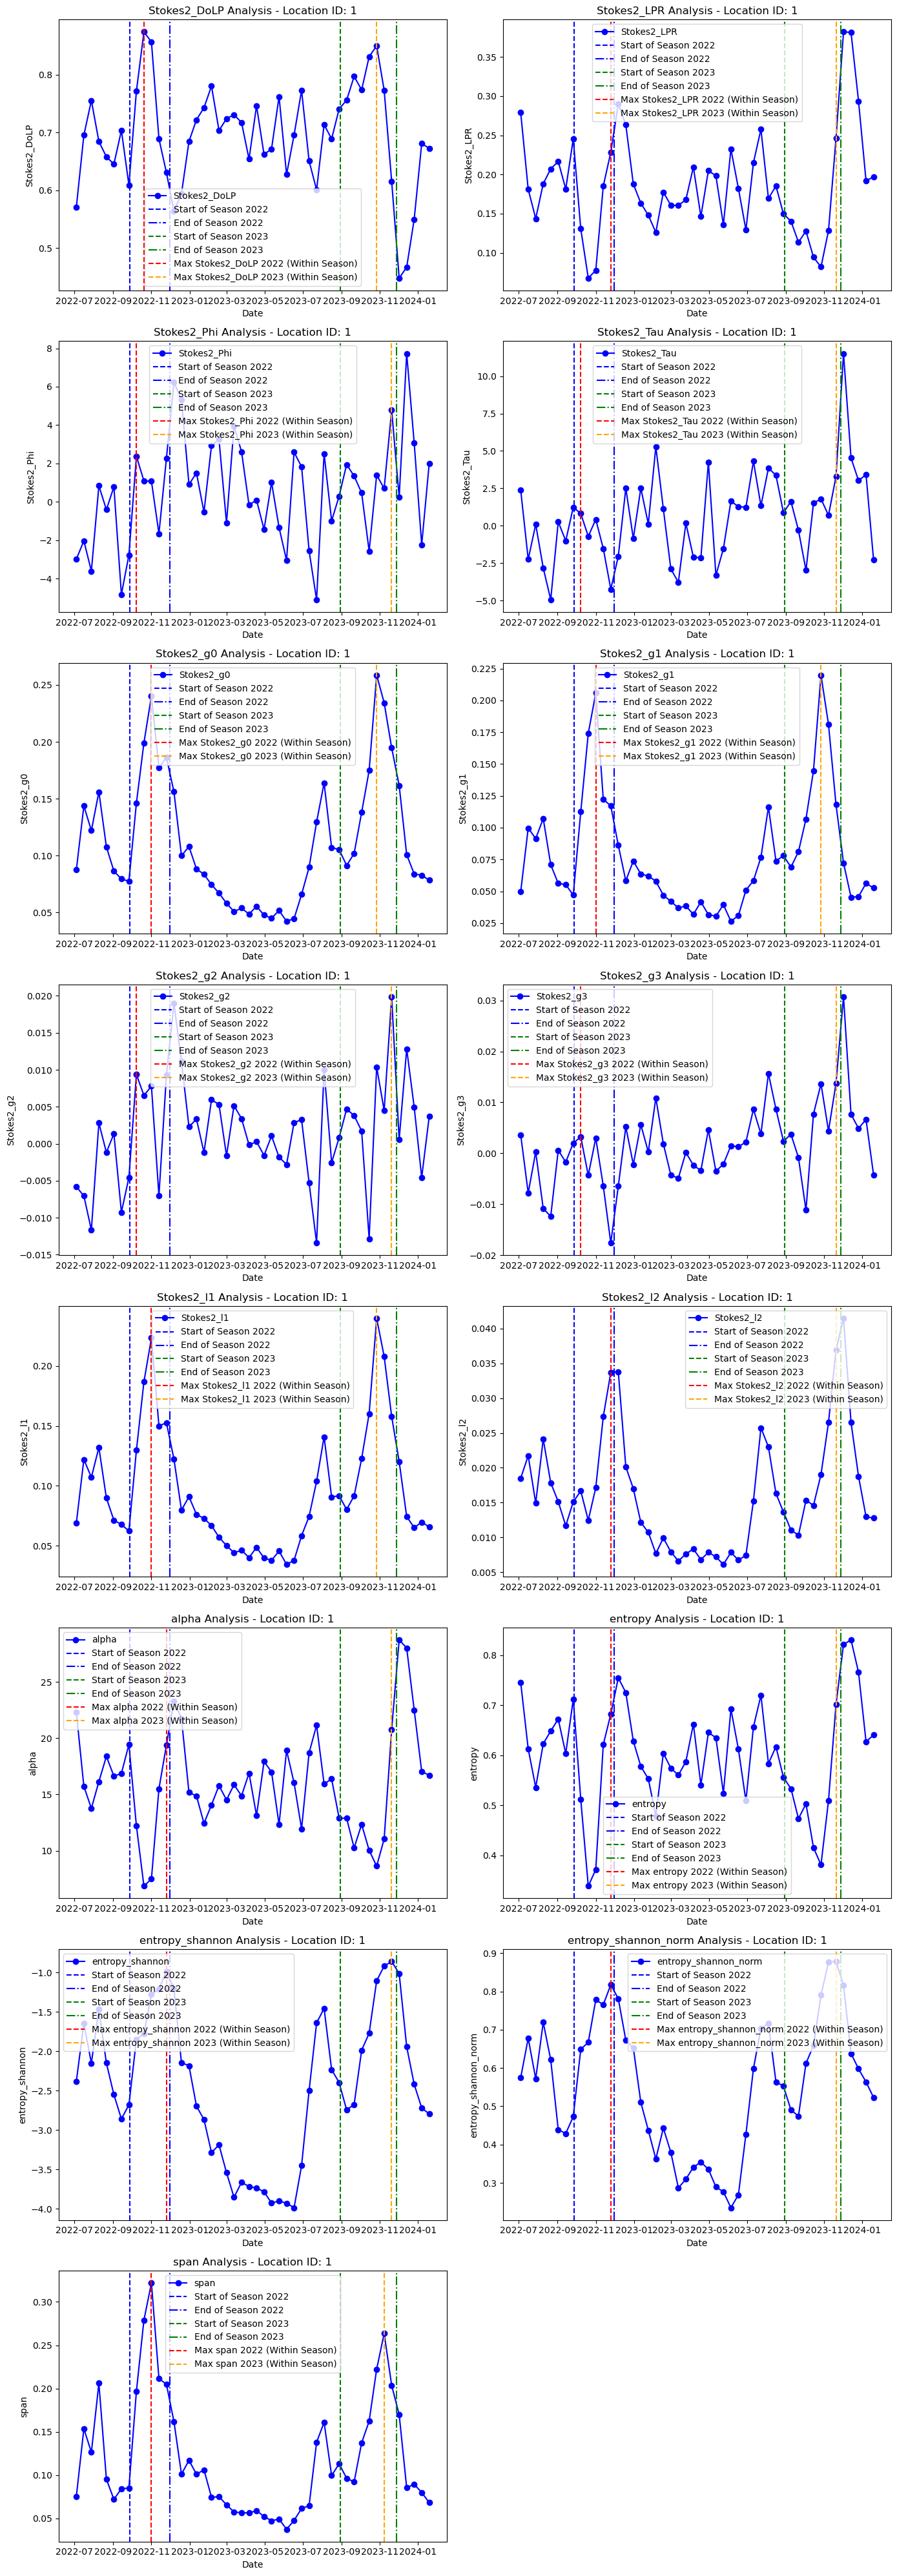

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que las columnas de fechas estén en formato datetime
crop_data['fecha_trasplante'] = pd.to_datetime(crop_data['fecha_trasplante'], errors='coerce')
crop_data['fecha_cosecha'] = pd.to_datetime(crop_data['fecha_cosecha'], errors='coerce')

# Filtrar los datos por 'location_id'
location_id = 1
crop_data_location = crop_data[crop_data['location_id'] == location_id]

# Definir las fechas de inicio y fin de temporada para 2022 y 2023
start_date_2022 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2022]['fecha_trasplante'].iloc[0]
end_date_2022 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2022]['fecha_cosecha'].iloc[0]

start_date_2023 = crop_data_location[crop_data_location['fecha_trasplante'].dt.year == 2023]['fecha_trasplante'].iloc[0]
end_date_2023 = crop_data_location[crop_data_location['fecha_cosecha'].dt.year == 2023]['fecha_cosecha'].iloc[0]

# Filtrar los datos de 'planet_data' para la ubicación específica
SAR_data_location = SAR_data[SAR_data['location_id'] == location_id]

# Lista de índices a graficar
indices = ['Stokes2_DoLP',	'Stokes2_LPR',	'Stokes2_Phi',	'Stokes2_Tau',	'Stokes2_g0',	'Stokes2_g1', 'Stokes2_g2',	'Stokes2_g3',	'Stokes2_l1',	'Stokes2_l2', 'alpha',	'entropy',	'entropy_shannon',	'entropy_shannon_norm',	'span']  # Añade aquí todos los índices que deseas plotear


# Configurar el número de gráficos por fila
plots_per_row = 2  # Cambia este número según la cantidad de plots por fila que desees

# Calcular el número de filas necesarias
num_rows = -(-len(indices) // plots_per_row)  # División entera redondeada hacia arriba

# Ajustar el tamaño de la figura dependiendo del número de filas y columnas
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 7, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes en un solo array

# Bucle para plotear cada índice
for i, index in enumerate(indices):
    # Filtrar los datos de NDVI solo entre trasplante y cosecha para 2022
    data_2022 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2022) & 
                                     (SAR_data_location['image_date'] <= end_date_2022)]

    # Filtrar los datos de NDVI solo entre trasplante y cosecha para 2023
    data_2023 = SAR_data_location[(SAR_data_location['image_date'] >= start_date_2023) & 
                                     (SAR_data_location['image_date'] <= end_date_2023)]

    # Identificar la fecha con el máximo valor de NDVI para cada año dentro del período de crecimiento
    max_value_date_2022 = data_2022.loc[data_2022[index].idxmax(), 'image_date']
    max_value_2022 = data_2022[index].max()

    max_value_date_2023 = data_2023.loc[data_2023[index].idxmax(), 'image_date']
    max_value_2023 = data_2023[index].max()

    # Graficar los resultados en el subplot correspondiente
    ax = axes[i]
    ax.plot(SAR_data_location['image_date'], SAR_data_location[index], label=index, color='blue', marker='o')

    # Señalar las fechas de inicio y fin de temporada para 2022
    ax.axvline(x=start_date_2022, color='blue', linestyle='--', label='Start of Season 2022')
    ax.axvline(x=end_date_2022, color='blue', linestyle='-.', label='End of Season 2022')

    # Señalar las fechas de inicio y fin de temporada para 2023
    ax.axvline(x=start_date_2023, color='green', linestyle='--', label='Start of Season 2023')
    ax.axvline(x=end_date_2023, color='green', linestyle='-.', label='End of Season 2023')

    # Señalar el máximo del índice en 2022 dentro del período de crecimiento
    ax.axvline(x=max_value_date_2022, color='red', linestyle='--', label=f'Max {index} 2022 (Within Season)')
    ax.scatter(max_value_date_2022, max_value_2022, color='red')

    # Señalar el máximo del índice en 2023 dentro del período de crecimiento
    ax.axvline(x=max_value_date_2023, color='orange', linestyle='--', label=f'Max {index} 2023 (Within Season)')
    ax.scatter(max_value_date_2023, max_value_2023, color='orange')

    # Etiquetas y leyenda
    ax.set_title(f'{index} Analysis - Location ID: {location_id}')
    ax.set_xlabel('Date')
    ax.set_ylabel(index)
    ax.legend()
    ax.grid(False)

# Si hay subplots vacíos, ocultarlos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()